In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from datetime import datetime
%matplotlib inline

In [2]:
# 连接数据库并读取数据
connection = pymysql.connect(host='localhost', user='kilo', passwd='839211046', db='practice_database')
sql = """select * from movie_comments order by rating_time"""
data = pd.read_sql(sql, connection)

In [3]:
# 以rating_time为时间序列，分别提取两部电影的数据
time = data.set_index('rating_time')
time_sample1 = time[time['movie_name'] == '复仇者联盟'].resample('60min').count()
time_sample2 = time[(time['movie_name'] == '惊奇队长') & (time.index< datetime(2019, 3, 30))].resample('D').count()

In [4]:
plt.style.use('ggplot') # 绘制seaborn风格的图表
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

Text(0, 0.5, '评论数')

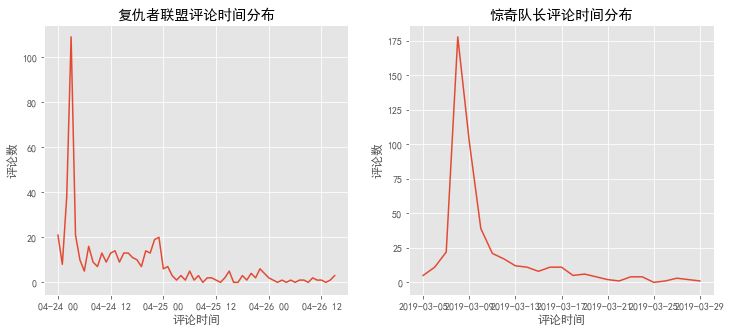

In [5]:
fig = plt.figure(figsize=(12,2))
fig.subplots_adjust(top=2)
ax1 = fig.add_subplot(121)
ax1.plot(time_sample1['movie_name'])
ax1.set_title('复仇者联盟评论时间分布')
ax1.set_xlabel('评论时间')
ax1.set_ylabel('评论数')
ax2 = fig.add_subplot(122)
ax2.plot(time_sample2['movie_name'])
ax2.set_title('惊奇队长评论时间分布')
ax2.set_xlabel('评论时间')
ax2.set_ylabel('评论数')
# plt.savefig("评论时间分布图.png",bbox_inches='tight', dpi=400)

In [6]:
sql = '''select location, count(*)
from user_information
where length(location) > 0
GROUP BY location
order by count(*) desc
limit 10'''
location = pd.read_sql(sql, connection)

In [7]:
location

,location,count(*)
0,北京,234
1,上海,108
2,广东广州,38
3,湖北武汉,27
4,浙江杭州,27
5,江苏南京,23
6,广东深圳,18
7,陕西西安,15
8,四川成都,15
9,重庆,14


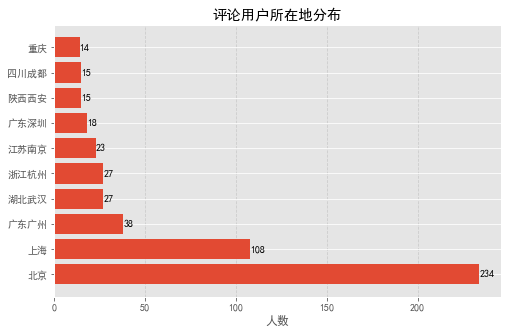

In [8]:
fig, ax1 = plt.subplots(figsize=(8,5))
x = location.loc[ : ,'location']
y = location.loc[ : ,'count(*)']
rects = ax1.barh(x, y)
# ax1.set_yticks(np.arange(len(x)))
ax1.set_yticklabels(x)
ax1.set_xlabel('人数')
ax1.set_title('评论用户所在地分布', weight='bold')
ax1.grid(True, linestyle='--', which='major', axis= 'x',
                   color='grey', alpha=.25)
##隐藏边框
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
for rect in rects:
    width = rect.get_width()
    height = rect.get_y() + rect.get_height()/2
    ax1.text(width, height, int(width), ha='left', va='center', color='black', weight='bold',
                clip_on=True)
#  保存图片
# plt.savefig('用户所在地分布.png', bbox_inches='tight', dpi=400)

In [9]:
comments_data = pd.read_sql('select * from movie_comments', connection)

In [10]:
comments_data.head()

,movie_name,user_name,watched,rating,rating_time,comment,votes,user_url
0,复仇者联盟,：-）,看过,力荐,2019-04-24 19:02:33,妇联在中国死的最晚，复活的最快！ps：今天刚顶着被辞退的风险看完妇联4值了！💯！期待下一个10年！,31,https://www.douban.com/people/151725552/
1,复仇者联盟,.M,看过,还行,2019-04-24 17:35:16,英雄集结那一段还是有小小感动和热血，和前几部一样，整个故事基本没有让人惊喜的地方，套路化的剧...,7,https://www.douban.com/people/grayfish/
2,复仇者联盟,。,看过,力荐,2019-04-24 00:00:03,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,8181,https://www.douban.com/people/186208874/
3,惊奇队长,"""eMily""┆rehab",看过,推荐,2019-03-09 22:44:25,Marvel扣题大作！最逆天人设英雄登场！坐等单挑响指灭霸👏这是个其貌不扬胸部平平屁股扁扁的...,0,https://www.douban.com/people/emilycou/
4,复仇者联盟,{莫热},看过,力荐,2019-04-25 08:49:58,MCU22。对于所有在满座剧场观影的观众来说，都是难得的巅峰体验，看着角色们死死生生，从穿越...,1,https://www.douban.com/people/xztiya/


In [11]:
comments_data['rating_num'] = np.nan
comments_data.loc[comments_data['rating'] == '力荐', 'rating_num'] = 5
comments_data.loc[comments_data['rating'] == '推荐', 'rating_num'] = 4
comments_data.loc[comments_data['rating'] == '还行', 'rating_num'] = 3
comments_data.loc[comments_data['rating'] == '较差', 'rating_num'] = 2
comments_data.loc[comments_data['rating'] == '很差', 'rating_num'] = 1
comments_data.head()

,movie_name,user_name,watched,rating,rating_time,comment,votes,user_url,rating_num
0,复仇者联盟,：-）,看过,力荐,2019-04-24 19:02:33,妇联在中国死的最晚，复活的最快！ps：今天刚顶着被辞退的风险看完妇联4值了！💯！期待下一个10年！,31,https://www.douban.com/people/151725552/,5.0
1,复仇者联盟,.M,看过,还行,2019-04-24 17:35:16,英雄集结那一段还是有小小感动和热血，和前几部一样，整个故事基本没有让人惊喜的地方，套路化的剧...,7,https://www.douban.com/people/grayfish/,3.0
2,复仇者联盟,。,看过,力荐,2019-04-24 00:00:03,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,8181,https://www.douban.com/people/186208874/,5.0
3,惊奇队长,"""eMily""┆rehab",看过,推荐,2019-03-09 22:44:25,Marvel扣题大作！最逆天人设英雄登场！坐等单挑响指灭霸👏这是个其貌不扬胸部平平屁股扁扁的...,0,https://www.douban.com/people/emilycou/,4.0
4,复仇者联盟,{莫热},看过,力荐,2019-04-25 08:49:58,MCU22。对于所有在满座剧场观影的观众来说，都是难得的巅峰体验，看着角色们死死生生，从穿越...,1,https://www.douban.com/people/xztiya/,5.0


In [12]:
avengers_data = comments_data.loc[comments_data['movie_name'] == '复仇者联盟']
captain_data = comments_data.loc[comments_data['movie_name'] == '惊奇队长']

In [13]:
# 滤出未评分的数据
rating_num_data= comments_data.loc[comments_data['rating_num'].notnull()]
# 计算两部电影的平均评分
rating_num = rating_num_data.groupby('movie_name')['rating_num'].mean()
rating_num

movie_name
复仇者联盟    3.965164
惊奇队长     3.151452
Name: rating_num, dtype: float64

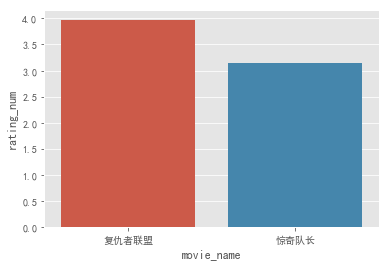

In [14]:
fig, ax = plt.subplots()
sns.barplot(rating_num.index, rating_num)
# plt.savefig('平均分对比.png', dpi=400)

In [15]:
votes_data1 = comments_data.groupby(['movie_name', 'rating'])['votes'].sum()
votes_data1.rename(index={'': '未评价'}, inplace=True)
# votes_data1
votes_data = votes_data1.reindex(['力荐', '推荐', '还行', '较差', '很差', '未评价'], level=1)
votes_data

movie_name  rating
复仇者联盟       力荐        83970
            推荐        18629
            还行         8181
            较差         4361
            很差         3889
            未评价         141
惊奇队长        力荐         7605
            推荐         8412
            还行        15883
            较差        10711
            很差         2373
            未评价          51
Name: votes, dtype: int64

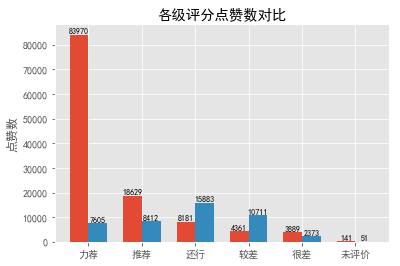

In [16]:
fig, ax = plt.subplots()
width = 0.35
x = votes_data.loc['复仇者联盟'].index
y = votes_data.loc['复仇者联盟']
y2 = votes_data.loc['惊奇队长']
index = np.arange(len(x))
rect1 = ax.bar(index, y, width, align='center', label='复仇者联盟')
rect2 = ax.bar(index + width, y2, width, align='center', label='惊奇队长')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(x)
ax.set_title('各级评分点赞数对比')
ax.set_ylabel('点赞数')
for rect in rect1:
    xloc = rect.get_x() + rect.get_width() / 2
    yloc = int(rect.get_height())
    ax.text(xloc, yloc,yloc, ha='center', va='bottom', color='black', fontsize=8)
for rect in rect2:
    xloc = rect.get_x() + rect.get_width() / 2
    yloc = int(rect.get_height())
    ax.text(xloc, yloc,yloc, ha='center', va='bottom', color='black', fontsize=8)
# plt.savefig('各级评分点赞数对比.png', bbox_inches='tight', dpi=400)

In [17]:
avengers_data.groupby('rating')['movie_name'].count()

rating
       11
力荐    232
很差     30
推荐    101
较差     34
还行     91
Name: movie_name, dtype: int64

In [18]:
all_rating = comments_data.groupby(['movie_name', 'rating'])['user_name'].count()
all_rating
# all_rating2 = all_rating.reindex['力荐', '推荐', '还行', '较差', '很差', '']

movie_name  rating
复仇者联盟                  11
            力荐        232
            很差         30
            推荐        101
            较差         34
            还行         91
惊奇队长                   17
            力荐         38
            很差         21
            推荐        127
            较差         88
            还行        208
Name: user_name, dtype: int64

In [19]:
avengers_rating = all_rating.loc['复仇者联盟'].reindex(['力荐', '推荐', '还行', '较差', '很差', ''])
avengers_rating
captain_rating = all_rating.loc['惊奇队长'].reindex(['力荐', '推荐', '还行', '较差', '很差', ''])

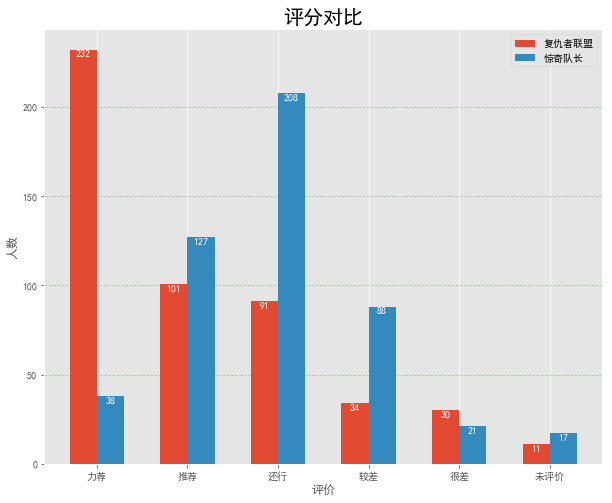

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
x = avengers_rating.index
y = avengers_rating
x2 = captain_rating.index
y2 = captain_rating
index = np.arange(len(x))
bar_width=0.3
rect1 = ax.bar(index, y, bar_width, align='center', label='复仇者联盟')
rect2 = ax.bar(index+bar_width, y2, bar_width, align='center', label='惊奇队长')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['力荐', '推荐', '还行', '较差', '很差', '未评价'])
ax.set_xlabel('评价', fontsize=12, weight='bold')
ax.set_ylabel('人数', fontsize=12, weight='bold')
ax.set_title('评分对比', fontsize=20)
for rect in rect1:
    yloc = int(rect.get_height())
    xloc = rect.get_x() + rect.get_width() / 2.0
    ax.text(xloc, yloc, yloc, ha='center', va='top', color='white')
for rect in rect2:
    yloc = int(rect.get_height())
    xloc = rect.get_x() + rect.get_width() / 2.0
    ax.text(xloc, yloc, yloc, ha='center', va='top', color='white')
ax.grid(True, linestyle='--', color='g', which='major', axis='y', alpha=0.25)    
ax.legend(loc='best')
#  plt.savefig('评分对比柱状图.png', dpi=400)

Text(0.5, 1.0, '惊奇队长评分占比')

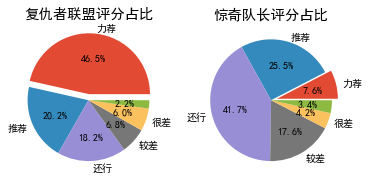

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
explode = [0.1, 0, 0, 0, 0, 0]
ax1.pie(avengers_rating, labels = list(avengers_rating.index), autopct='%1.1f%%', 
       explode=explode)
ax2.pie(captain_rating, labels = list(captain_rating.index), autopct='%1.1f%%',
       explode=explode)
ax1.set_title('复仇者联盟评分占比')
ax2.set_title('惊奇队长评分占比')
# plt.savefig('复联与惊奇队长评分对比饼状图.png', dpi=400)

In [22]:
sql = 'select * from user_information'
user_information = pd.read_sql(sql, connection)

In [23]:
user_information.head()

,user_name,location,sign_time,watching_num,wish_num,collect_num,movie_name
0,：-）,湖北黄石,2016-09-28,NaN,1.0,181,复仇者联盟
1,.M,广东深圳,2010-06-18,4.0,158.0,1181,复仇者联盟
2,。,,2018-10-21,NaN,NaN,8,复仇者联盟
3,"""eMily""┆rehab",广东广州,2007-09-22,75.0,1245.0,1264,惊奇队长
4,{莫热},Singapore,2008-03-07,10.0,156.0,1064,复仇者联盟


In [24]:
#把缺失值替换为0
user_information.fillna(0, inplace=True)
user_information.head()

,user_name,location,sign_time,watching_num,wish_num,collect_num,movie_name
0,：-）,湖北黄石,2016-09-28,0.0,1.0,181,复仇者联盟
1,.M,广东深圳,2010-06-18,4.0,158.0,1181,复仇者联盟
2,。,,2018-10-21,0.0,0.0,8,复仇者联盟
3,"""eMily""┆rehab",广东广州,2007-09-22,75.0,1245.0,1264,惊奇队长
4,{莫热},Singapore,2008-03-07,10.0,156.0,1064,复仇者联盟


In [25]:
from datetime import datetime
user_information['Year of registration'] =np.nan
user_information['sign_time']=pd.to_datetime(user_information['sign_time'])
# user_information.dtypes
user_information['Year of registration'] = (datetime.now() - user_information['sign_time'])
user_information.head()

,user_name,location,sign_time,watching_num,wish_num,collect_num,movie_name,Year of registration
0,：-）,湖北黄石,2016-09-28,0.0,1.0,181,复仇者联盟,946 days 18:06:59.778612
1,.M,广东深圳,2010-06-18,4.0,158.0,1181,复仇者联盟,3240 days 18:06:59.778612
2,。,,2018-10-21,0.0,0.0,8,复仇者联盟,193 days 18:06:59.778612
3,"""eMily""┆rehab",广东广州,2007-09-22,75.0,1245.0,1264,惊奇队长,4240 days 18:06:59.778612
4,{莫热},Singapore,2008-03-07,10.0,156.0,1064,复仇者联盟,4073 days 18:06:59.778612


In [26]:
user_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
user_name               998 non-null object
location                998 non-null object
sign_time               998 non-null datetime64[ns]
watching_num            998 non-null float64
wish_num                998 non-null float64
collect_num             998 non-null int64
movie_name              998 non-null object
Year of registration    998 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), timedelta64[ns](1)
memory usage: 62.5+ KB


In [27]:
user_information.describe()

,watching_num,wish_num,collect_num,Year of registration
count,998.000000,998.000000,998.000000,998
mean,12.331663,594.654309,1948.280561,2958 days 11:07:06.993040
std,25.983314,1452.577464,1970.620641,1288 days 12:06:57.355944
min,0.000000,0.000000,1.000000,9 days 18:06:59.778612
25%,0.000000,32.000000,626.500000,2107 days 06:06:59.778612
50%,3.000000,217.000000,1476.500000,3160 days 06:06:59.778612
75%,13.000000,606.500000,2571.250000,3980 days 12:06:59.778611
max,227.000000,31264.000000,20311.000000,5046 days 18:06:59.778612
